### Importing Libraries for our code

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt # we only need pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from pylab import plt
import math
# set the default Seaborn style for graphics
sb.set() 

### Importing the data

In [2]:
ufc_new = pd.read_csv("ufc_master_STABLE.csv")
ufc_new.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Curtis Blaydes,Chris Daukaus,-550.0,400,18.181818,400.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,Punch,2.0,0:17,317.0,260.0,1300.0,800.0,1500.0,-125.0,430.0
1,Joanne Wood,Alexa Grasso,230.0,-280,230.000000,35.714286,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,Rear Naked Choke,1.0,3:57,237.0,340.0,-140.0,1000.0,800.0,900.0,650.0
2,Matt Brown,Bryan Barberena,-105.0,-115,95.238095,86.956522,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,260.0,1200.0,800.0,160.0,300.0
3,Askar Askarov,Kai Kara-France,-440.0,340,22.727273,340.000000,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,-120.0,550.0,300.0,2200.0,700.0,550.0
4,Neil Magny,Max Griffin,-260.0,210,38.461538,210.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,NaN,3.0,5:00,900.0,-120.0,400.0,750.0,1400.0,500.0,500.0


### Distinguish datasets by relevant characteristics of the fighters

In [3]:
mycol = ['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds','Winner','weight_class',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_pct',
 'B_Weight_lbs',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_pct',
 'R_Weight_lbs','R_age',
 'B_age',
 'lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_wins','R_draw','R_losses','B_wins','B_draw','B_losses',
]

### Information on Dataset Columns

>R_fighter (String) - Gives us the Red Fighter Name

>B_fighter (String) - Gives us the Blue Fighter Name

>R_odds  (Numerical Value) - Red Odds (Money line)


>B_odds (Numerical Value) - Blue Odds (Money line)

>Winner (Categorical Value) - Gives us the winner, either Red or Blue 

>Weight Class (Categorical Value) - Gives us the weight class of both fighters

>B_avg_SIG_STR_Pct (Numerical Value) - Gives us the blue Significant Striking Accuracy in percentage

>B_avg_SUB_ATT (Numerical Value) - Gives us the Blue Average Submissions Attempted per 15 Minutes

>B_avg_TD_pct (Numerical Value) - Gives us the Blue Takedown Accuracy in percentage

>B_Weight_lbs (Numerical Value) - Gives us the Blue weight in lbs

>B_age (Numerical Value) - Gives us the Blue age

>R_avg_SIG_STR_Pct (Numerical Value) - Gives us the Red Significant Striking Accuracy in percentage

>R_avg_SUB_ATT (Numerical Value) - Gives us the Red Average Submissions Attempted per 15 Minutes

>R_avg_TD_pct (Numerical Value) - Gives us the Red Takedown Accuracy in percentage

>R_Weight_lbs (Numerical Value) - Gives us the Red weight in lbs

>R_age (Numerical Value) - Gives us the Red age


>Lose_streak_dif (Numerical Value) - Gives us the difference in their current lose streak: Blue’s Win Streak - Red’s Win Streak

>Win_streak_dif (Numerical Value) - Gives us the difference in their current win streak: Blue’s Win Streak - Red’s Win Streak

>Longest_win_streak_dif ( Numerical Value ) - Gives us the difference in the duration of their longest win streak: Blue’s Longest Win Streak - Red’s Longest Win Streak

>Win_dif ( Numerical Value ) - Gives us the difference in the number of wins throughout the fighters’ careers: Blue’s Wins- Red’s Wins

>Loss_dif ( Numerical Value ) - Gives us the difference in the number of losses : Blue’s Losses- Red’s Losses

>Height_dif ( Numerical Value ) - Gives us the difference in the height: Blue’s height- Red’s height

>Reach_dif ( Numerical Value ) - Gives us the difference in the reach: Blue’s reach - Red’s reach

>Age_dif ( Numerical Value ) - Gives us the difference in the age: Blue’s age - Red’s age

>Better rank (Categorical Value) - Gives us an indication of which fighter has a better ranking


### We check our dataset first to find out the possible outcomes for the winner column.

In [4]:
cleandataset = pd.DataFrame(ufc_new[mycol])
print((cleandataset["Winner"].unique()))

['Red' 'Blue']


### Cleaning the Dataset
We will be working on heavyweight dataset set . We also clean our dataset by removing all NaN rows.



In [5]:
heavyweightdata = cleandataset[cleandataset["weight_class"]=="Heavyweight"]

In [6]:
heavyweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 5137
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               404 non-null    object 
 1   B_fighter               404 non-null    object 
 2   R_odds                  404 non-null    float64
 3   B_odds                  404 non-null    int64  
 4   Winner                  404 non-null    object 
 5   weight_class            404 non-null    object 
 6   B_avg_SIG_STR_pct       345 non-null    float64
 7   B_avg_SUB_ATT           338 non-null    float64
 8   B_avg_TD_pct            336 non-null    float64
 9   B_Weight_lbs            404 non-null    int64  
 10  R_avg_SIG_STR_pct       384 non-null    float64
 11  R_avg_SUB_ATT           384 non-null    float64
 12  R_avg_TD_pct            382 non-null    float64
 13  R_Weight_lbs            404 non-null    int64  
 14  R_age                   404 non-null    i

In [7]:
for x in mycol:
    heavyweightdata = heavyweightdata[heavyweightdata[x].isnull()==False]

heavyweightdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 5137
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               333 non-null    object 
 1   B_fighter               333 non-null    object 
 2   R_odds                  333 non-null    float64
 3   B_odds                  333 non-null    int64  
 4   Winner                  333 non-null    object 
 5   weight_class            333 non-null    object 
 6   B_avg_SIG_STR_pct       333 non-null    float64
 7   B_avg_SUB_ATT           333 non-null    float64
 8   B_avg_TD_pct            333 non-null    float64
 9   B_Weight_lbs            333 non-null    int64  
 10  R_avg_SIG_STR_pct       333 non-null    float64
 11  R_avg_SUB_ATT           333 non-null    float64
 12  R_avg_TD_pct            333 non-null    float64
 13  R_Weight_lbs            333 non-null    int64  
 14  R_age                   333 non-null    i

### Creating New Function
Since better rank is a categorical variable, to able to use it in our binary classification and logistic regression model, we had to encode values to it so 0 will be used to represent “neither”, 1 will be used to represent “blue” and -1 will be used to represent “red”.

In [8]:
def myfunc(myStr):
    if myStr=="neither":
        return 0
    elif myStr=="Red":
        return -1
    else:
        return 1
    

heavyweightdata['better_rank'] = heavyweightdata['better_rank'].apply(myfunc)

### Creating new predictor variables
The current columns available to us are specific to each side (e.g red,blue) but for our prediction of outcome, it will be more useful to have variables that reflected the differences between the fighters so we created additional columns for the comparisons using the columns provided to us by the dataset.


In [9]:
#creating pct dif n weight dif  'B_avg_SUB_ATT','B_avg_TD_pct'
heavyweightdata["weight_dif"] = heavyweightdata['B_Weight_lbs']-heavyweightdata['R_Weight_lbs']
heavyweightdata["avg_SIG_STR_dif"] = heavyweightdata['B_avg_SIG_STR_pct']-heavyweightdata['R_avg_SIG_STR_pct']
heavyweightdata["avg_TD_dif"] = heavyweightdata['B_avg_TD_pct']-heavyweightdata['R_avg_TD_pct']
heavyweightdata["avg_SUB_ATT_dif"] = heavyweightdata['B_avg_SUB_ATT']-heavyweightdata['R_avg_SUB_ATT']
heavyweightdata["R_win_pct"] = heavyweightdata["R_wins"]*100/(heavyweightdata["R_wins"]+heavyweightdata["R_draw"]+heavyweightdata["R_losses"])
heavyweightdata["B_win_pct"] = heavyweightdata["B_wins"]*100/(heavyweightdata["B_wins"]+heavyweightdata["B_draw"]+heavyweightdata["B_losses"])
heavyweightdata["win_pct_dif"] = heavyweightdata["B_win_pct"]-heavyweightdata["R_win_pct"]
heavyweightdata.head(20)

,R_fighter,B_fighter,R_odds,B_odds,Winner,weight_class,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_pct,B_Weight_lbs,...,B_wins,B_draw,B_losses,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif,R_win_pct,B_win_pct,win_pct_dif
0,Curtis Blaydes,Chris Daukaus,-550.0,400,Red,Heavyweight,0.50,0.0,0.00,250,...,4,0,1,-15,-0.01,-0.53,0.0,76.923077,80.000000,3.076923
12,Alexander Volkov,Tom Aspinall,115.0,-135,Blue,Heavyweight,0.65,2.0,1.00,256,...,4,0,0,6,0.08,0.30,1.9,72.727273,100.000000,27.272727
19,Shamil Abdurakhimov,Sergei Pavlovich,270.0,-340,Blue,Heavyweight,0.50,0.0,0.00,257,...,2,0,1,22,0.06,-0.23,-0.2,55.555556,66.666667,11.111111
42,Serghei Spivac,Greg Hardy,-180.0,155,Red,Heavyweight,0.50,0.0,0.33,265,...,6,0,4,5,0.01,-0.27,-0.2,57.142857,60.000000,2.857143
64,Parker Porter,Alan Baudot,-280.0,230,Red,Heavyweight,0.56,0.0,0.00,243,...,0,0,2,-22,0.07,-0.28,-0.5,66.666667,0.000000,-66.666667
75,Derrick Lewis,Tai Tuivasa,-170.0,150,Blue,Heavyweight,0.52,0.0,0.00,264,...,7,0,3,4,0.02,-0.28,0.0,73.913043,70.000000,-3.913043
79,Andrei Arlovski,Jared Vanderaa,-150.0,125,Red,Heavyweight,0.48,0.0,1.00,265,...,2,0,2,25,0.04,0.64,-0.2,56.097561,50.000000,-6.097561
87,William Knight,Maxim Grishin,140.0,-165,Blue,Heavyweight,0.52,0.0,0.33,205,...,1,0,2,0,-0.08,-0.09,-0.2,83.333333,33.333333,-50.000000
101,Francis Ngannou,Ciryl Gane,135.0,-160,Red,Heavyweight,0.58,0.6,0.22,245,...,7,0,0,-5,0.17,-0.40,0.3,84.615385,100.000000,15.384615
113,Jake Collier,Chase Sherman,-135.0,115,Red,Heavyweight,0.45,0.0,0.00,250,...,3,0,7,20,0.03,-0.26,-0.5,44.444444,30.000000,-14.444444


In [10]:
heavyweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 5137
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               333 non-null    object 
 1   B_fighter               333 non-null    object 
 2   R_odds                  333 non-null    float64
 3   B_odds                  333 non-null    int64  
 4   Winner                  333 non-null    object 
 5   weight_class            333 non-null    object 
 6   B_avg_SIG_STR_pct       333 non-null    float64
 7   B_avg_SUB_ATT           333 non-null    float64
 8   B_avg_TD_pct            333 non-null    float64
 9   B_Weight_lbs            333 non-null    int64  
 10  R_avg_SIG_STR_pct       333 non-null    float64
 11  R_avg_SUB_ATT           333 non-null    float64
 12  R_avg_TD_pct            333 non-null    float64
 13  R_Weight_lbs            333 non-null    int64  
 14  R_age                   333 non-null    i

### Further Cleaning of Dataset

We experienced zero division error when computing the win percentages for debuting fighters with a clean record, so we had to do .fillna() to resolve this problem.

In [11]:
heavyweightdata["B_win_pct"].fillna(value = 0, inplace = True)
heavyweightdata["R_win_pct"].fillna(value = 0, inplace = True)
heavyweightdata["win_pct_dif"].fillna(value = 0, inplace = True)

In [12]:
heavyweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 5137
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               333 non-null    object 
 1   B_fighter               333 non-null    object 
 2   R_odds                  333 non-null    float64
 3   B_odds                  333 non-null    int64  
 4   Winner                  333 non-null    object 
 5   weight_class            333 non-null    object 
 6   B_avg_SIG_STR_pct       333 non-null    float64
 7   B_avg_SUB_ATT           333 non-null    float64
 8   B_avg_TD_pct            333 non-null    float64
 9   B_Weight_lbs            333 non-null    int64  
 10  R_avg_SIG_STR_pct       333 non-null    float64
 11  R_avg_SUB_ATT           333 non-null    float64
 12  R_avg_TD_pct            333 non-null    float64
 13  R_Weight_lbs            333 non-null    int64  
 14  R_age                   333 non-null    i

### Generating Train - Test Split

We then chose the variables that we believed play the most part in predicting the outcome of the match and we split our dataset into test and train set. We split our dataset into 75% train data and 25% test data,as well as fixing the randomness of the split to ensure consistency in the results obtained.
 

In [13]:
# Extract Response and Predictors
y = heavyweightdata["Winner"]
X = heavyweightdata[['lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_odds',
 'B_odds',"weight_dif","avg_SIG_STR_dif","avg_TD_dif","avg_SUB_ATT_dif"]]

    
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (249,) (249, 13)
Test Set  : (84,) (84, 13)


In [14]:
X_test

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,age_dif,better_rank,R_odds,B_odds,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif
4366,-1,0,-1,-3,1,8,0,-210.0,190,2,0.152857,0.193333,-1.000000
3353,0,0,-3,-3,0,-4,0,-310.0,280,0,-0.225000,-0.337500,0.000000
87,1,-2,-2,-4,1,4,0,140.0,-165,0,-0.080000,-0.090000,-0.200000
2254,2,1,1,1,0,10,0,205.0,-245,9,0.036667,0.000000,0.000000
778,0,3,-7,-28,-15,-11,-1,-159.0,130,0,-0.170000,-0.040000,-0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,0,1,-2,-4,-1,-5,-1,-460.0,365,-9,0.007500,-0.263056,-0.138889
2820,-1,-3,4,9,-2,-2,-1,-240.0,200,-25,-0.301513,-0.082237,0.263158
19,-2,2,-1,-3,-3,-11,-1,270.0,-340,22,0.060000,-0.230000,-0.200000
1672,0,1,2,2,-1,6,-1,-380.0,315,25,0.002833,-0.148833,-0.583333


In [15]:
y_train.value_counts()

Red     138
Blue    111
Name: Winner, dtype: int64

# Training Our Machine Learning Model

### Binary Classification Model

We used binary classification to help us get a predicted outcome since our outcome is a categorical value. Binary classification is capable of returning probability and predicted outcome which we used in our Kelly Criterion computations.

In [16]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=3)

[Text(1534.5, 951.3000000000001, 'B_odds <= -173.5\ngini = 0.494\nsamples = 249\nvalue = [111, 138]\nclass = Red'),
 Text(837.0, 679.5, 'avg_TD_dif <= 0.663\ngini = 0.395\nsamples = 48\nvalue = [35, 13]\nclass = Blue'),
 Text(558.0, 407.70000000000005, 'avg_TD_dif <= -0.268\ngini = 0.346\nsamples = 45\nvalue = [35, 10]\nclass = Blue'),
 Text(279.0, 135.89999999999998, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = Red'),
 Text(837.0, 135.89999999999998, 'gini = 0.266\nsamples = 38\nvalue = [32, 6]\nclass = Blue'),
 Text(1116.0, 407.70000000000005, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Red'),
 Text(2232.0, 679.5, 'avg_TD_dif <= -0.285\ngini = 0.47\nsamples = 201\nvalue = [76, 125]\nclass = Red'),
 Text(1674.0, 407.70000000000005, 'avg_SIG_STR_dif <= -0.041\ngini = 0.298\nsamples = 44\nvalue = [8, 36]\nclass = Red'),
 Text(1395.0, 135.89999999999998, 'gini = 0.08\nsamples = 24\nvalue = [1, 23]\nclass = Red'),
 Text(1953.0, 135.89999999999998, 'gini = 0.455\nsamples = 20\n

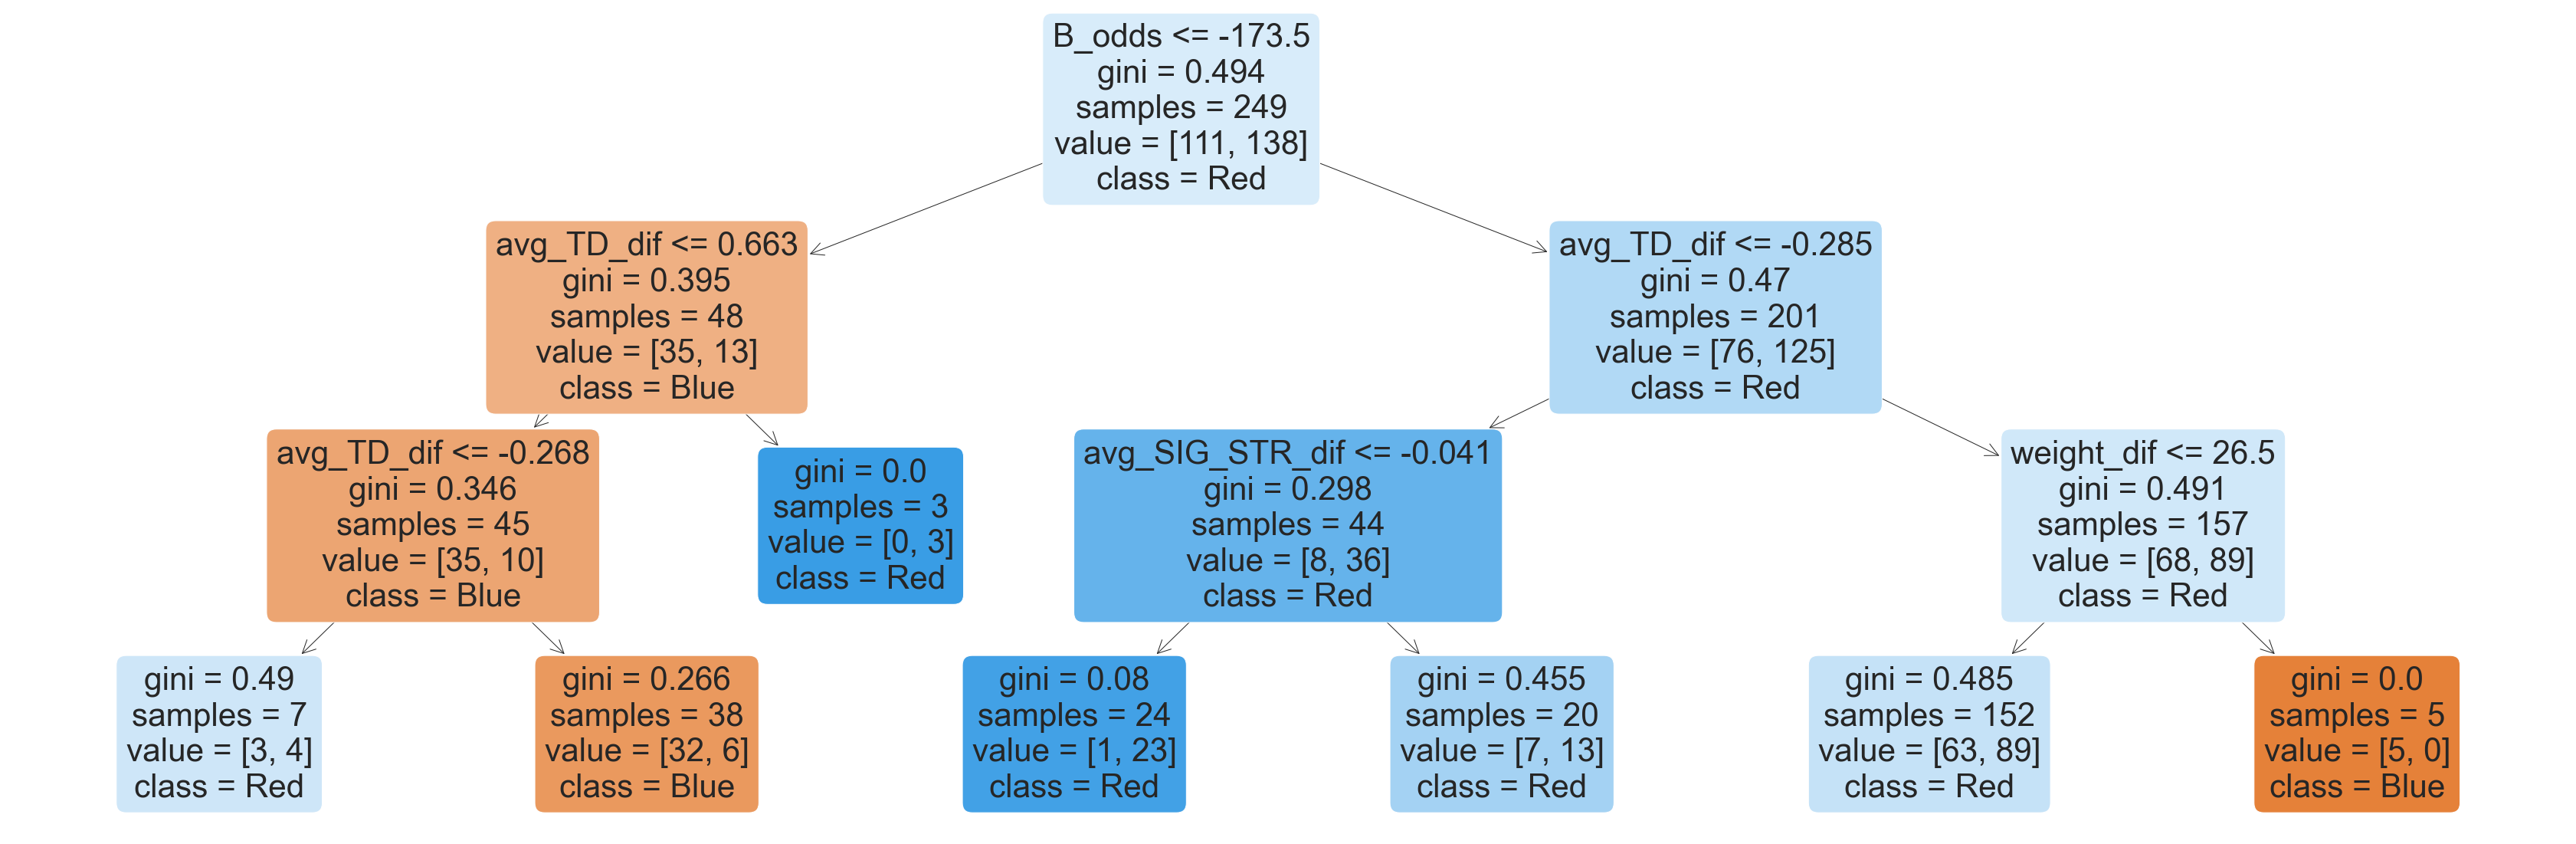

In [17]:

f = mplt.figure(figsize=(60,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.678714859437751

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	66.67%
False Negative Rate:	4.35%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6666666666666666

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	77.78%
False Negative Rate:	12.28%



<AxesSubplot:>

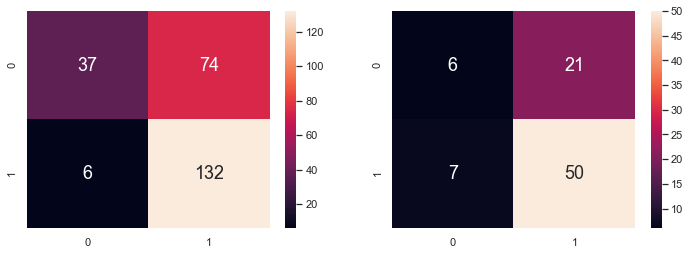

In [18]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [19]:
list(y_test)

['Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue']

In [20]:
heavyweight_len = len(y_test)

In [21]:
odds_tuple_list = []
for x in range(heavyweight_len):
    mytuple = (X_test.iloc[x]["R_odds"],X_test.iloc[x]["B_odds"])
    odds_tuple_list.append(mytuple)

### Getting Decimal Odds for Easier Computation

We are given money-line odds and we are converting it to decimal odds since it will be easier to calculate the profits for our betting strategy.

In [22]:
red_decimal_odds_list = []
blue_decimal_odds_list = []
for i in odds_tuple_list:
    red,blue=i
    if red>0:
        red=((red/100)+1).round(3)
    elif red<0:
        red=((100/red)+1).round(3)
    
    if blue>0:
        blue=((blue/100)+1).round(3)
    elif blue<0:
        blue=((100/blue)+1).round(3)
    red_decimal_odds_list.append(red)
    blue_decimal_odds_list.append(blue)

In [23]:
red_decimal_odds_list

[0.524,
 0.677,
 2.4,
 3.05,
 0.371,
 0.655,
 0.667,
 0.057,
 0.524,
 0.545,
 2.9,
 2.55,
 0.31,
 2.35,
 0.394,
 0.459,
 0.5,
 0.789,
 0.667,
 2.5,
 0.767,
 0.13,
 0.556,
 0.8,
 0.091,
 0.444,
 2.05,
 2.63,
 3.7,
 0.333,
 0.31,
 0.057,
 2.25,
 2.05,
 0.355,
 2.45,
 0.355,
 0.78,
 2.15,
 0.806,
 0.844,
 0.71,
 2.35,
 0.259,
 2.7,
 0.71,
 0.048,
 0.683,
 2.2,
 0.474,
 2.0,
 3.55,
 2.85,
 0.231,
 2.18,
 0.762,
 0.355,
 0.75,
 4.35,
 3.6,
 2.4,
 0.512,
 0.459,
 0.412,
 0.672,
 0.583,
 3.35,
 0.821,
 0.091,
 2.55,
 0.762,
 0.333,
 0.767,
 0.697,
 0.574,
 0.623,
 0.029,
 0.818,
 0.13,
 0.783,
 0.583,
 3.7,
 0.737,
 2.2]

### DataFrame of all the prediction information from Binary Classification Model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [24]:
y_prob = dectree.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list


### Random betting strategy

To highlight the effectiveness of Kelly Criterion and our Machine Learning models in our decision making, We needed a basis for comparison, so we created a random betting stategy and illustrate the outcome.

In [25]:
import random
red = y_test.value_counts()["Red"]
blue = y_test.value_counts()["Blue"]
randomised_outcomes = []
random.seed(2)

for x in range(red):
    randomised_outcomes.append("Red")
    
for x in range(blue):
    randomised_outcomes.append("Blue")
    
random.shuffle(randomised_outcomes)

In [26]:
I =  len(y_test)


def random_simulation(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    
    for i in range(I):
        f = random.random()
        actual_outcome = compare_prob.iloc[i]["Winner"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        choice = randomised_outcomes[i]

        if (choice==actual_outcome):
            if(choice=="Red"):
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
        else:
            c[0,i+1] = (1-f) * c[0,i]          
    return c
        

In [27]:
random_simulation(100)
print(random_simulation(100))
print("\n")
print(f'Final Outcome: ${math.floor(random_simulation(100)[0][-1])}')


[[1.00000000e+02 1.08945244e+02 1.42385439e+02 1.55381257e+02
  1.29901891e+01 1.64027467e+01 1.67401163e+01 1.94953601e+01
  5.57825664e+00 5.16798890e+00 5.39452213e+00 6.09006386e+00
  1.83830900e+01 2.19385991e+01 1.40444545e+01 1.78324811e+01
  1.28619064e+01 3.20675888e+00 3.58910103e+00 4.51017237e+00
  4.78118144e+00 6.65907065e+00 6.73509577e+00 6.04871381e+00
  6.14453409e+00 1.53253779e+00 1.37127756e+00 1.33776339e+00
  4.42144600e-01 1.18462634e+00 5.50219436e-01 3.41134560e-01
  3.54448065e-01 8.48814864e-02 6.70444470e-02 8.62297732e-02
  1.76143061e-01 1.72387228e-01 2.51900397e-01 2.98660557e-02
  2.12405400e-03 3.16622495e-03 5.23578860e-03 1.33970033e-02
  1.50618343e-02 1.52085583e-02 2.55819458e-02 2.57275676e-02
  1.62988559e-02 4.10546721e-02 5.92000177e-02 4.09501609e-02
  1.68056671e-01 2.06577510e-01 2.11588835e-01 2.20781885e-01
  3.51221439e-01 1.06146676e+00 1.99491634e-01 1.87523976e-01
  6.80159194e-02 3.65014349e-02 1.30013756e-01 1.66628554e-01
  1.6574

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

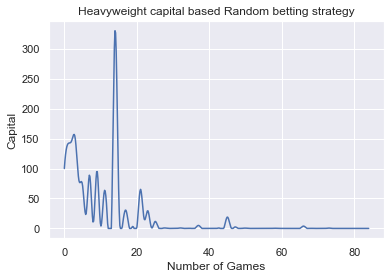

In [28]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []


for i in range(0,heavyweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(random_simulation(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Heavyweight capital based Random betting strategy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Binary Classification Model depth 3 with Kelly Criterion

#### Kelly Criterion
The Kelly criterion is a mathematical formula relating to the long-term growth of capital developed by John L. Kelly Jr. while working at AT&T's Bell Laboratories. It is used to determine how much to invest in a given asset, in order to maximize wealth growth over time. 

#### How Kelly Criterion is calculated:

### f* = p - q/b

 where:
  <br>
 f* is the fraction of the current asset to wager.
 <br>
 p is the probability of a win.
  <br>
 q is the probabality of a loss (q=1-p).
  <br>
 b is the proportion of the bet gained with a win.
  <br>

After attaining our binary classification model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [29]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [30]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[100.         100.         160.7125      94.3657278  126.50967465
  126.50967465 200.64961524 200.64961524 200.64961524 200.64961524
  200.64961524 115.64534474  60.8234073   60.8234073  119.30591373
  119.30591373 119.30591373 119.30591373   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

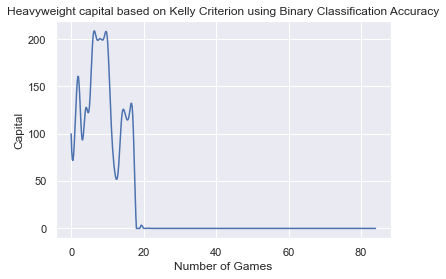

In [31]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,heavyweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_binary(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Heavyweight capital based on Kelly Criterion using Binary Classification Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Decision Tree depth 5 with Kelly Criterion

In [32]:
# Decision Tree using Train Data
dectree5 = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree5.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

[Text(1593.0, 996.6, 'B_odds <= -173.5\ngini = 0.494\nsamples = 249\nvalue = [111, 138]\nclass = Red'),
 Text(702.0, 815.4000000000001, 'avg_TD_dif <= 0.663\ngini = 0.395\nsamples = 48\nvalue = [35, 13]\nclass = Blue'),
 Text(594.0, 634.2, 'avg_TD_dif <= -0.268\ngini = 0.346\nsamples = 45\nvalue = [35, 10]\nclass = Blue'),
 Text(216.0, 453.0, 'weight_dif <= -0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = Red'),
 Text(108.0, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Red'),
 Text(324.0, 271.79999999999995, 'weight_dif <= 12.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Blue'),
 Text(216.0, 90.59999999999991, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Blue'),
 Text(432.0, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Red'),
 Text(972.0, 453.0, 'win_dif <= -0.5\ngini = 0.266\nsamples = 38\nvalue = [32, 6]\nclass = Blue'),
 Text(756.0, 271.79999999999995, 'avg_SIG_STR_dif <= 0.111\ngini = 0.083\nsamples = 23\nvalue = 

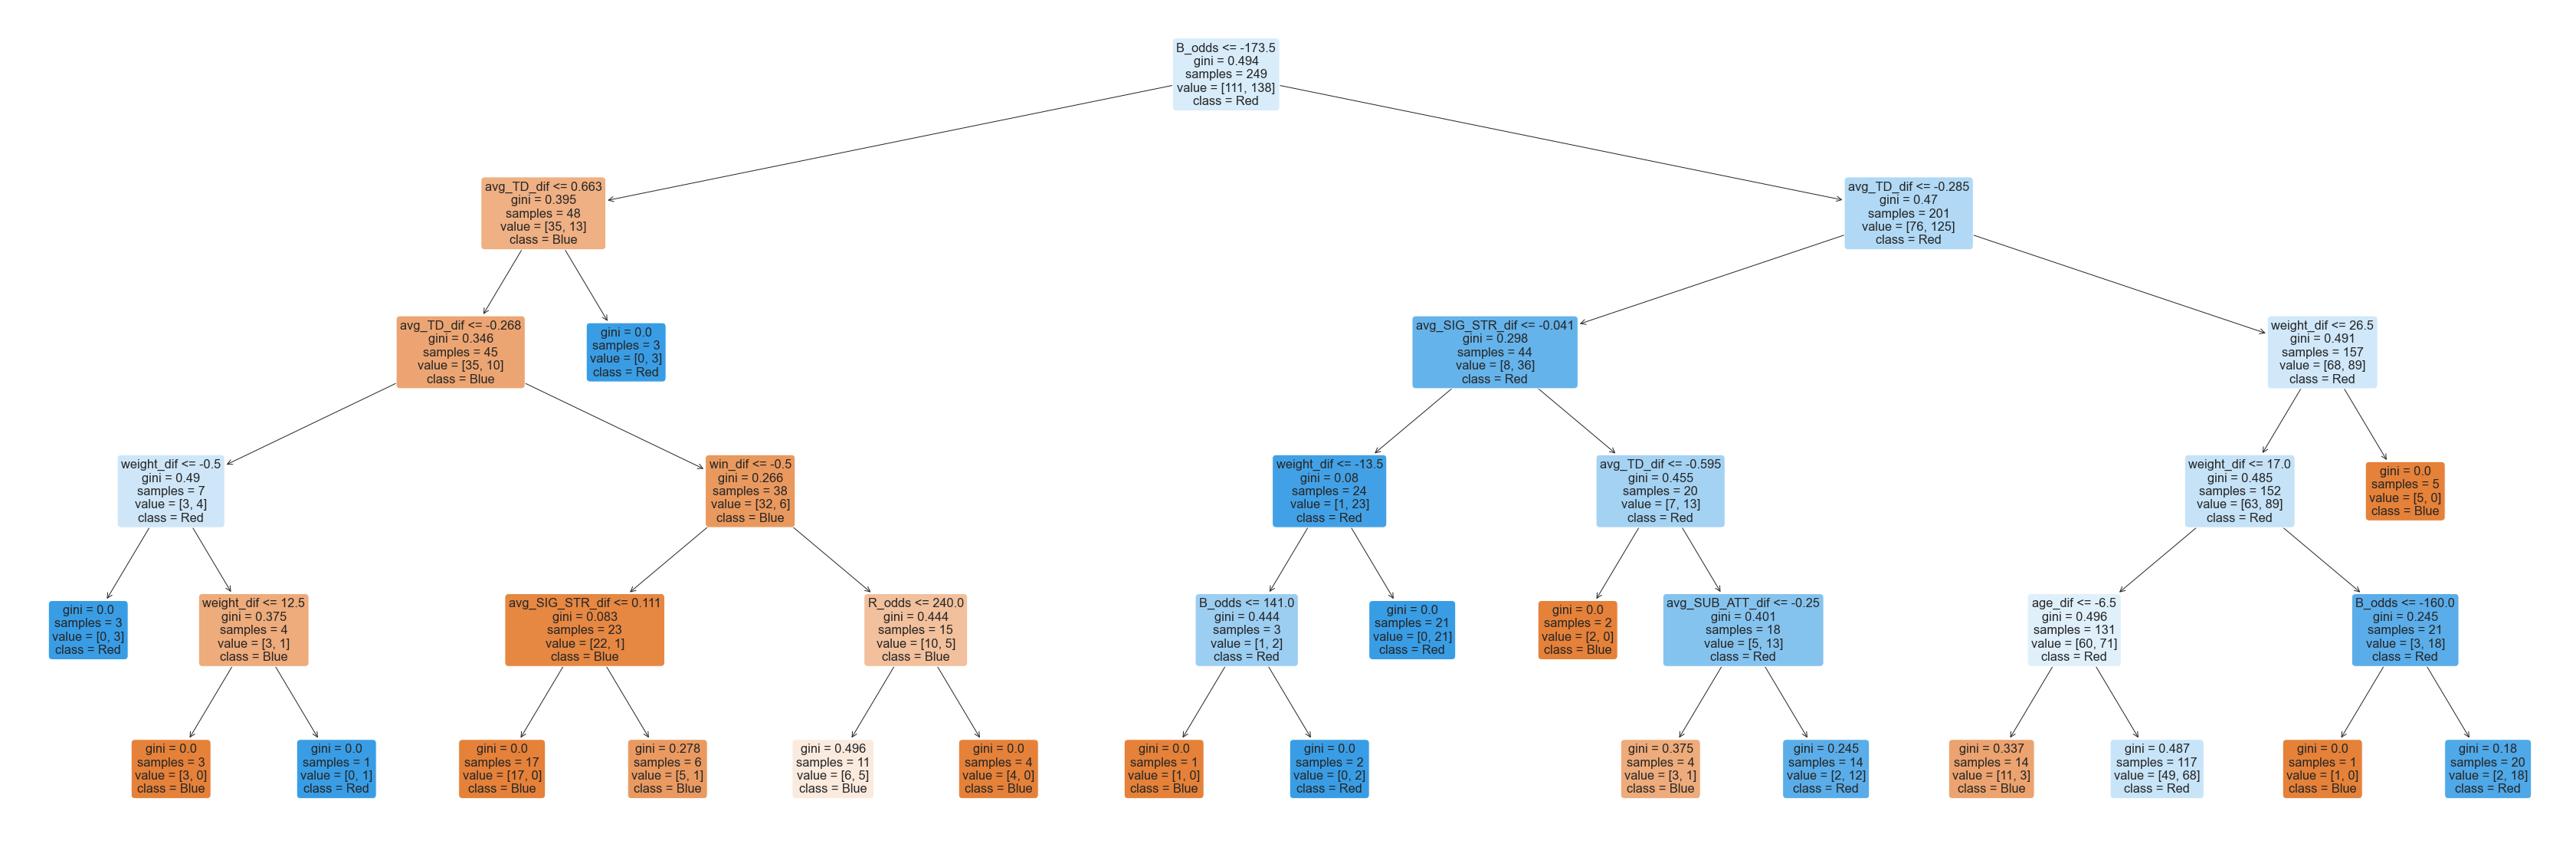

In [33]:
f = mplt.figure(figsize=(60,20))
plot_tree(dectree5, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7469879518072289

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	47.75%
False Negative Rate:	7.25%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6785714285714286

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	51.85%
False Negative Rate:	22.81%



<AxesSubplot:>

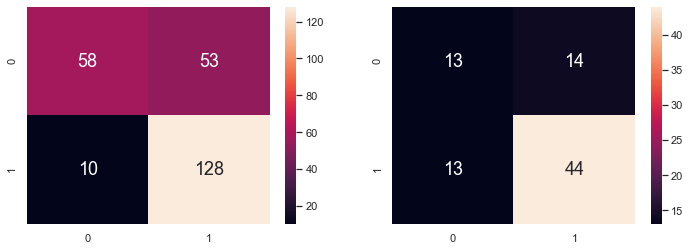

In [34]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree5.predict(X_train)
y_test_pred = dectree5.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree5.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree5.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [35]:
y_prob = dectree5.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list

In [36]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [37]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[100.         100.         167.7         99.49722222  99.49722222
   30.59076087  50.62770924  75.95675217  75.95675217  22.09123861
   22.09123861   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        

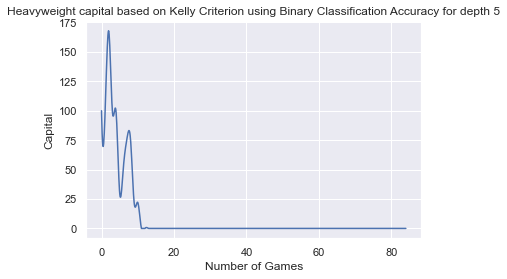

In [38]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,heavyweight_len + 1):
    x_curve_plot.append(i)
    check = run_simulation_pure_kelly_criterion_binary(100)[0][i]
    if check <=0:
        check = 0
    y_curve_plot.append(check)
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 1000)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
        
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Heavyweight capital based on Kelly Criterion using Binary Classification Accuracy for depth 5")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Alternative Machine Learning Model - Logistic Regression 

We then calculated the classification accuracy, true postive rate and false positive rate for our decision tree model. We only need false positive rate for our case since we would not be betting for negatives. We have decided to compare Binary Classification with Logistic Regression to see if there is a more reliable model for our betting strategy. (i.e higher classification accuracy).

Accuracy =  0.6190476190476191
              precision    recall  f1-score   support

        Blue       0.40      0.37      0.38        27
         Red       0.71      0.74      0.72        57

    accuracy                           0.62        84
   macro avg       0.56      0.55      0.55        84
weighted avg       0.61      0.62      0.62        84

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	62.96%
False Negative Rate:	26.32%



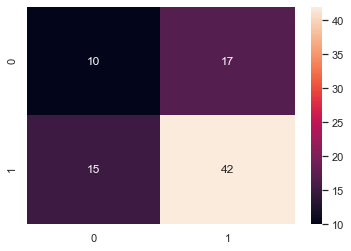

In [39]:
logmodel = LogisticRegression(max_iter = 3000)
lm = logmodel.fit(X_train,y_train)
predictions = lm.predict(X_test)
print("Accuracy = ",lm.score(X_test,y_test))
print(classification_report(y_test,predictions))
test = confusion_matrix(y_test,predictions)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
hm = sb.heatmap(data = test,annot = True)
  
# displaying the plotted heatmap
plt.show()

In [40]:
probability = lm.predict_proba(X_test).round(3)
probability

array([[0.413, 0.587],
       [0.229, 0.771],
       [0.451, 0.549],
       [0.548, 0.452],
       [0.379, 0.621],
       [0.24 , 0.76 ],
       [0.429, 0.571],
       [0.592, 0.408],
       [0.496, 0.504],
       [0.467, 0.533],
       [0.513, 0.487],
       [0.665, 0.335],
       [0.358, 0.642],
       [0.546, 0.454],
       [0.359, 0.641],
       [0.281, 0.719],
       [0.386, 0.614],
       [0.307, 0.693],
       [0.418, 0.582],
       [0.525, 0.475],
       [0.303, 0.697],
       [0.587, 0.413],
       [0.255, 0.745],
       [0.282, 0.718],
       [0.553, 0.447],
       [0.328, 0.672],
       [0.414, 0.586],
       [0.514, 0.486],
       [0.541, 0.459],
       [0.316, 0.684],
       [0.275, 0.725],
       [0.717, 0.283],
       [0.459, 0.541],
       [0.566, 0.434],
       [0.363, 0.637],
       [0.617, 0.383],
       [0.37 , 0.63 ],
       [0.261, 0.739],
       [0.47 , 0.53 ],
       [0.286, 0.714],
       [0.166, 0.834],
       [0.262, 0.738],
       [0.663, 0.337],
       [0.3

### DataFrame of all the prediction information from logistic regression model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [41]:
y_prob_logistic = lm.predict_proba(X_test).round(3)
y_prob_logistic = pd.DataFrame(y_prob_logistic[:,1], columns = ["Probability_Of_Red"], index = X_test.index)
Winner_df_logistic = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_logistic_df = pd.DataFrame(predictions,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob_logistic = pd.concat([Winner_df,Predicted_Winner_logistic_df, y_prob_logistic], axis = 1)
compare_prob_logistic["Probability_Of_Blue"] = 1 - compare_prob_logistic["Probability_Of_Red"]
compare_prob_logistic["Red Decimal Odds"] = red_decimal_odds_list
compare_prob_logistic["Blue Decimal Odds"] = blue_decimal_odds_list
compare_prob_logistic


,Winner,Predicted_Winner,Probability_Of_Red,Probability_Of_Blue,Red Decimal Odds,Blue Decimal Odds
4366,Red,Red,0.587,0.413,0.524,2.900
3353,Red,Red,0.771,0.229,0.677,3.800
87,Blue,Red,0.549,0.451,2.400,0.394
2254,Blue,Blue,0.452,0.548,3.050,0.592
778,Red,Red,0.621,0.379,0.371,2.300
...,...,...,...,...,...,...
3220,Blue,Red,0.717,0.283,0.783,4.650
2820,Red,Red,0.695,0.305,0.583,3.000
19,Blue,Blue,0.280,0.720,3.700,0.706
1672,Red,Red,0.640,0.360,0.737,4.150


### Logistic Regression Model with Kelly Criterion
After attaining our logistic regression model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [42]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c


c_1 = run_simulation_pure_kelly_criterion_logistic(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[100.         100.         129.2967      82.60981657  82.60981657
   82.60981657 103.90662729 103.90662729 103.90662729 103.90662729
  103.90662729 103.90662729 103.90662729 103.90662729 103.90662729
  103.90662729  92.80944477  92.80944477 115.06301501 115.06301501
  115.06301501 141.71149422 141.71149422 164.27479833 212.30874936
  212.30874936 212.30874936 130.77183308 130.77183308 130.77183308
  130.77183308 130.77183308 130.77183308  86.70172533  86.70172533
   86.70172533  86.70172533  86.70172533 114.04918354  78.53479825
  101.26936578 155.74175256 196.54297689 196.54297689 196.54297689
  127.66558255 167.4423481  167.4423481  172.46494877 172.46494877
  111.88419497  81.39575184  81.39575184  81.39575184  81.39575184
   56.39829503  64.69234109  64.69234109  76.41782791 100.98615959
   93.60768723 165.18012489 165.18012489 165.18012489 165.18012489
  189.46028181 176.45121741 176.45121741 258.66072186 258.66072186
  164.92410497 180.46028551 180.46028551 254.77978627 302.2205

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

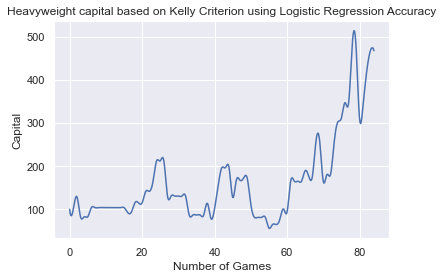

In [43]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,heavyweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_logistic(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Heavyweight capital based on Kelly Criterion using Logistic Regression Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

In [44]:
def findmaxindex(ylist):
    for i in ylist:
        if i==max(ylist):
            return  list(ylist).index(i)

In [45]:
findmaxindex(y)

78

### Preferred Choice of Model with Kelly Criterion and Take Profit/Stop Loss

Based on the end result of both model, we have decided to go ahead with the logistic regression model as our preferred model as it yields a higher return on the test dataset based on Kelly Criterion. We provided of take profit/stop loss as this option is a crucial part of investment/gambling.

In [46]:
def takeprofit(capital):
    while True:
        try:
            profit = int(input("Please enter take profit as a percentage of your capital(>= 0): "))
            if profit>=0:
                break
        except:
            print("Please enter an integer")
    return (profit/100 + 1)*capital

def stoploss(capital):
    while True:  
        try:
            Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            if(Stoploss>=0):
                if(Stoploss/100 *capital) <= capital:
                    break
                else:
                    Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            else:
                Stoploss = int(input("Please enter stop loss as a percentage of your capital(>=0%): "))
        except:
            print("Please enter an integer!")
    return (Stoploss/100 *capital)

In [47]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic_modified(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    profit = takeprofit(capital)
    stop_loss = stoploss(capital)
    
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        if(c[0][i] >= profit):
            c[0][i+1] = c[0][i]
            continue
            
        if(c[0][i]<= stop_loss):
            c[0][i+1] = c[0][i]
            continue
            
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
                
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
            
            
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds

            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            

    return c


c_1 = run_simulation_pure_kelly_criterion_logistic_modified(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

Please enter take profit as a percentage of your capital(>= 0): 1000
Please enter stop loss as a percentage of your capital(<= 100%): 10
[[100.         100.         129.2967      82.60981657  82.60981657
   82.60981657 103.90662729 103.90662729 103.90662729 103.90662729
  103.90662729 103.90662729 103.90662729 103.90662729 103.90662729
  103.90662729  92.80944477  92.80944477 115.06301501 115.06301501
  115.06301501 141.71149422 141.71149422 164.27479833 212.30874936
  212.30874936 212.30874936 130.77183308 130.77183308 130.77183308
  130.77183308 130.77183308 130.77183308  86.70172533  86.70172533
   86.70172533  86.70172533  86.70172533 114.04918354  78.53479825
  101.26936578 155.74175256 196.54297689 196.54297689 196.54297689
  127.66558255 167.4423481  167.4423481  172.46494877 172.46494877
  111.88419497  81.39575184  81.39575184  81.39575184  81.39575184
   56.39829503  64.69234109  64.69234109  76.41782791 100.98615959
   93.60768723 165.18012489 165.18012489 165.18012489 165.1

###  Key Takeaways

As seen from the graph of the capital without any stop loss/take profit option, we can see that the end outcome may not be the most profitable so the introduction of take profit/stop loss gives the user more flexibility on when to stop betting.



**Conclusion:**
Based on our analysis, logistic regression has a better accuracy score and yields higher profits than binary classification when used in Kelly Criterion Model.Kelly Criterion Model will increase our profits at the end if our machine learning model has a decently high accuracy. 

<br>

We would recommend a typical player to use our Kelly criterion formula as a guideline on the proportion of money to put in each games rather than random betting as seen from the difference in the amount of money left at the end.

<br>


For players with specific risk tolerance, they can use our modified model to achieve their goals. I.e High risk tolerance players can set a higher take profit and lower stop loss in hopes of winning more money, while low risk tolerance players can set a relatively lower take profit and a higher stop loss to minimise their losses. 

<br>


**Ultimately, the outcome depends on the risk aversion of the players.**
